In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from scipy.stats import linregress, pearsonr

from parabola.laplace_nn2 import *

from tqdm import tqdm

from sklearn.model_selection import KFold, LeaveOneOut

In [2]:
# import data 
df_0 = pd.read_csv("data/universal_df.csv")
df_1 = pd.read_csv("data/design_1_df.csv")
df_2 = pd.read_csv("data/design_2_df.csv")

In [3]:
# define features and response
features = df_0.columns.values[:3]
response = df_0.columns.values[3:]

# matrix of inputs and responses 
X_0 = np.array(df_0[features].values, float)
Y_0 = np.array(df_0[response].values, float)
X_1 = np.array(df_1[features].values, float)
Y_1 = np.array(df_1[response].values, float)
X_2 = np.array(df_2[features].values, float)
Y_2 = np.array(df_2[response].values, float)

# scale Y so that max value is 1
X = np.concatenate([X_0, X_1, X_2])
Y = np.concatenate([Y_0, Y_1, Y_2])
Y_max = np.nanmax(Y, 0)
Y_0 = Y_0 / Y_max
Y_1 = Y_1 / Y_max 
Y_2 = Y_2 / Y_max
Y = np.concatenate([Y_0, Y_1, Y_2])

In [4]:
# set up Kfold 
kf = KFold(n_splits=20, shuffle=True, random_state=123)
kf.get_n_splits(X)

# set up matrix of model predictions
Ypred_model = np.zeros_like(Y)
Ystdv_model = np.zeros_like(Y)

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    Xtrain = X[train_index]
    Ytrain = Y[train_index]
    Xtest = X[test_index]
    
    # init NN 
    n_inputs = len(features)
    n_hidden = 8
    n_outputs = len(response)
    ffnn = FFNN(n_inputs, n_hidden, n_outputs)
    
    # fit NN 
    ffnn.fit(Xtrain, Ytrain)
    
    # make predictions 
    pred, stdv = ffnn.predict(Xtest)
    Ypred_model[test_index] = pred
    Ystdv_model[test_index] = stdv 

Fold 0:
Updating precision...
Evidence -216.332
Updating precision...
Evidence 1382.610
Updating precision...
Evidence 2382.553
Updating precision...
Evidence 2672.365
Updating precision...
Evidence 2703.065
Updating precision...
Evidence 2706.900
Updating precision...
Evidence 2707.739
Pass count  1


2024-03-28 10:13:17.174537: W external/xla/xla/service/cpu/onednn_matmul.cc:172] [Perf]: MatMul reference implementation being executed


Fold 1:
Updating precision...
Evidence -194.144
Updating precision...
Evidence 1347.867
Updating precision...
Evidence 2370.556
Updating precision...
Evidence 2677.467
Updating precision...
Evidence 2732.203
Updating precision...
Evidence 2741.450
Updating precision...
Evidence 2745.640
Updating precision...
Evidence 2748.008
Pass count  1


2024-03-28 10:13:23.990114: W external/xla/xla/service/cpu/onednn_matmul.cc:172] [Perf]: MatMul reference implementation being executed


Fold 2:
Updating precision...
Evidence -210.488
Updating precision...
Evidence 1418.912
Updating precision...
Evidence 2432.634
Updating precision...
Evidence 2712.707
Updating precision...
Evidence 2749.198
Updating precision...
Evidence 2752.400
Updating precision...
Evidence 2752.707
Pass count  1


2024-03-28 10:13:28.630098: W external/xla/xla/service/cpu/onednn_matmul.cc:172] [Perf]: MatMul reference implementation being executed


Fold 3:
Updating precision...
Evidence -218.330
Updating precision...
Evidence 1386.799
Updating precision...
Evidence 2398.669
Updating precision...
Evidence 2706.358
Updating precision...
Evidence 2739.936
Updating precision...
Evidence 2744.385
Updating precision...
Evidence 2745.377
Pass count  1
Fold 4:


2024-03-28 10:13:33.995836: W external/xla/xla/service/cpu/onednn_matmul.cc:172] [Perf]: MatMul reference implementation being executed


Updating precision...
Evidence -201.441
Updating precision...
Evidence 1445.434
Updating precision...
Evidence 2480.248
Updating precision...
Evidence 2778.361
Updating precision...
Evidence 2812.101
Updating precision...
Evidence 2816.453
Updating precision...
Evidence 2817.563
Pass count  1


2024-03-28 10:13:37.752156: W external/xla/xla/service/cpu/onednn_matmul.cc:172] [Perf]: MatMul reference implementation being executed


Fold 5:
Updating precision...
Evidence -204.329
Updating precision...
Evidence 1431.398
Updating precision...
Evidence 2423.029
Updating precision...
Evidence 2706.473
Updating precision...
Evidence 2736.228
Updating precision...
Evidence 2740.852
Updating precision...
Evidence 2742.693
Pass count  1
Fold 6:


2024-03-28 10:13:42.231875: W external/xla/xla/service/cpu/onednn_matmul.cc:172] [Perf]: MatMul reference implementation being executed


Updating precision...
Evidence -207.838
Updating precision...
Evidence 1449.930
Updating precision...
Evidence 2462.366
Updating precision...
Evidence 2755.574
Updating precision...
Evidence 2783.990
Updating precision...
Evidence 2787.295
Updating precision...
Evidence 2788.532
Pass count  1


2024-03-28 10:13:46.337367: W external/xla/xla/service/cpu/onednn_matmul.cc:172] [Perf]: MatMul reference implementation being executed


Fold 7:
Updating precision...
Evidence -192.587
Updating precision...
Evidence 1466.690
Updating precision...
Evidence 2525.143
Updating precision...
Evidence 2815.964
Updating precision...
Evidence 2849.358
Updating precision...
Evidence 2854.309
Updating precision...
Evidence 2855.805
Pass count  1


2024-03-28 10:13:51.012786: W external/xla/xla/service/cpu/onednn_matmul.cc:172] [Perf]: MatMul reference implementation being executed


Fold 8:
Updating precision...
Evidence -217.077
Updating precision...
Evidence 1406.959
Updating precision...
Evidence 2448.165
Updating precision...
Evidence 2780.422
Updating precision...
Evidence 2832.154
Updating precision...
Evidence 2839.973
Updating precision...
Evidence 2840.765
Pass count  1


2024-03-28 10:13:56.709816: W external/xla/xla/service/cpu/onednn_matmul.cc:172] [Perf]: MatMul reference implementation being executed


Fold 9:
Updating precision...
Evidence -200.314
Updating precision...
Evidence 1416.858
Updating precision...
Evidence 2471.582
Updating precision...
Evidence 2793.699
Updating precision...
Evidence 2831.311
Updating precision...
Evidence 2835.104
Updating precision...
Evidence 2836.190
Pass count  1
Fold 10:


2024-03-28 10:14:02.995360: W external/xla/xla/service/cpu/onednn_matmul.cc:172] [Perf]: MatMul reference implementation being executed


Updating precision...
Evidence -197.074
Updating precision...
Evidence 1384.519
Updating precision...
Evidence 2424.016
Updating precision...
Evidence 2724.380
Updating precision...
Evidence 2761.708
Updating precision...
Evidence 2774.922
Updating precision...
Evidence 2783.275
Updating precision...
Evidence 2785.749
Pass count  1
Fold 11:


2024-03-28 10:14:08.528533: W external/xla/xla/service/cpu/onednn_matmul.cc:172] [Perf]: MatMul reference implementation being executed


Updating precision...
Evidence -188.898
Updating precision...
Evidence 1444.122
Updating precision...
Evidence 2433.585
Updating precision...
Evidence 2739.216
Updating precision...
Evidence 2780.103
Updating precision...
Evidence 2797.309
Updating precision...
Evidence 2809.394
Updating precision...
Evidence 2817.129
Updating precision...
Evidence 2821.919
Updating precision...
Evidence 2823.096
Pass count  1


2024-03-28 10:14:13.763617: W external/xla/xla/service/cpu/onednn_matmul.cc:172] [Perf]: MatMul reference implementation being executed


Fold 12:
Updating precision...
Evidence -206.364
Updating precision...
Evidence 1363.222
Updating precision...
Evidence 2394.076
Updating precision...
Evidence 2717.802
Updating precision...
Evidence 2768.637
Updating precision...
Evidence 2776.336
Updating precision...
Evidence 2777.610
Pass count  1


2024-03-28 10:14:18.437046: W external/xla/xla/service/cpu/onednn_matmul.cc:172] [Perf]: MatMul reference implementation being executed


Fold 13:
Updating precision...
Evidence -195.790
Updating precision...
Evidence 1375.467
Updating precision...
Evidence 2377.408
Updating precision...
Evidence 2688.827
Updating precision...
Evidence 2730.736
Updating precision...
Evidence 2736.865
Updating precision...
Evidence 2739.334
Pass count  1


2024-03-28 10:14:24.189053: W external/xla/xla/service/cpu/onednn_matmul.cc:172] [Perf]: MatMul reference implementation being executed


Fold 14:
Updating precision...
Evidence -207.647
Updating precision...
Evidence 1395.198
Updating precision...
Evidence 2481.427
Updating precision...
Evidence 2815.439
Updating precision...
Evidence 2856.125
Updating precision...
Evidence 2861.327
Updating precision...
Evidence 2863.006
Pass count  1


2024-03-28 10:14:30.408832: W external/xla/xla/service/cpu/onednn_matmul.cc:172] [Perf]: MatMul reference implementation being executed


Fold 15:
Updating precision...
Evidence -211.641
Updating precision...
Evidence 1448.133
Updating precision...
Evidence 2511.867
Updating precision...
Evidence 2836.739
Updating precision...
Evidence 2886.907
Updating precision...
Evidence 2894.047
Updating precision...
Evidence 2897.732
Updating precision...
Evidence 2899.414
Pass count  1
Fold 16:


2024-03-28 10:14:36.230372: W external/xla/xla/service/cpu/onednn_matmul.cc:172] [Perf]: MatMul reference implementation being executed


Updating precision...
Evidence -218.911
Updating precision...
Evidence 1410.581
Updating precision...
Evidence 2431.754
Updating precision...
Evidence 2710.525
Updating precision...
Evidence 2744.030
Updating precision...
Evidence 2749.893
Updating precision...
Evidence 2750.869
Pass count  1
Fold 17:


2024-03-28 10:14:41.198414: W external/xla/xla/service/cpu/onednn_matmul.cc:172] [Perf]: MatMul reference implementation being executed


Updating precision...
Evidence -208.081
Updating precision...
Evidence 1381.349
Updating precision...
Evidence 2406.616
Updating precision...
Evidence 2676.954
Updating precision...
Evidence 2702.612
Updating precision...
Evidence 2707.062
Updating precision...
Evidence 2712.260
Updating precision...
Evidence 2721.336
Updating precision...
Evidence 2724.701
Updating precision...
Evidence 2726.252
Pass count  1
Fold 18:


2024-03-28 10:14:48.247801: W external/xla/xla/service/cpu/onednn_matmul.cc:172] [Perf]: MatMul reference implementation being executed


Updating precision...
Evidence -196.139
Updating precision...
Evidence 1468.849
Updating precision...
Evidence 2494.228
Updating precision...
Evidence 2800.108
Updating precision...
Evidence 2842.459
Updating precision...
Evidence 2848.180
Updating precision...
Evidence 2849.613
Pass count  1
Fold 19:


2024-03-28 10:14:56.563695: W external/xla/xla/service/cpu/onednn_matmul.cc:172] [Perf]: MatMul reference implementation being executed


Updating precision...
Evidence -220.214
Updating precision...
Evidence 1366.928
Updating precision...
Evidence 2378.867
Updating precision...
Evidence 2669.121
Updating precision...
Evidence 2705.967
Updating precision...
Evidence 2712.154
Updating precision...
Evidence 2713.314
Pass count  1


2024-03-28 10:15:04.941402: W external/xla/xla/service/cpu/onednn_matmul.cc:172] [Perf]: MatMul reference implementation being executed


In [5]:
r_vals = []
p_vals = []
y_true = []
y_pred = []
y_stdv = [] 
for y, ypred, ystdv in zip(Y.T, Ypred_model.T, Ystdv_model.T):
    inds_nan = np.isnan(y)
    
    y_true.append(y[~inds_nan])
    y_pred.append(ypred[~inds_nan])
    y_stdv.append(ystdv[~inds_nan])
    
    r_val, p_val = pearsonr(y[~inds_nan], ypred[~inds_nan])
    r_vals.append(r_val)
    p_vals.append(p_val) 
    
r_vals = np.array(r_vals)
p_vals = np.array(p_vals)

y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)
y_stdv = np.concatenate(y_stdv)

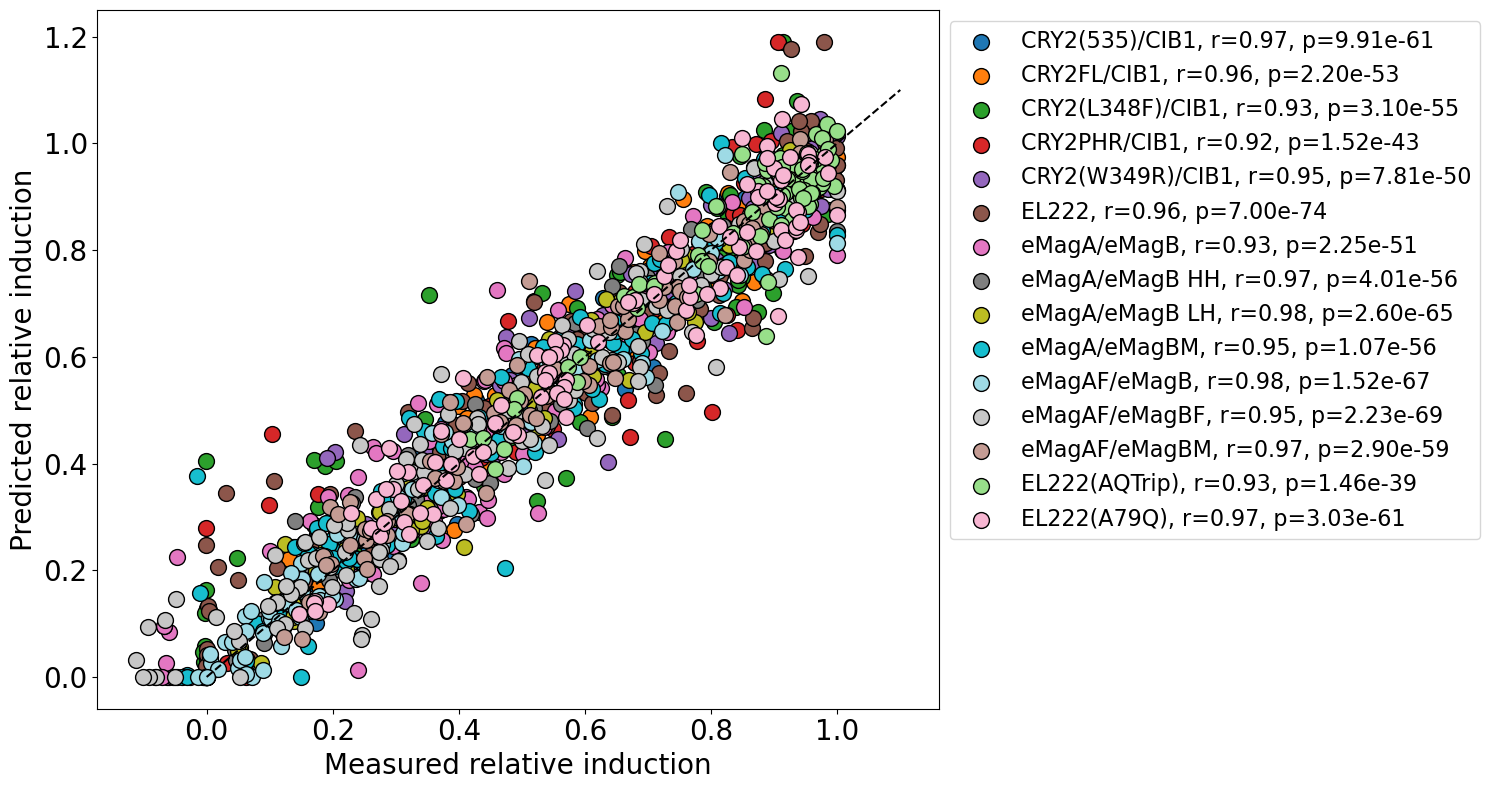

In [10]:
colors = [
    "#1f77b4",  # Blue
    "#ff7f0e",  # Orange
    "#2ca02c",  # Green
    "#d62728",  # Red
    "#9467bd",  # Purple
    "#8c564b",  # Brown
    "#e377c2",  # Pink
    "#7f7f7f",  # Gray
    "#bcbd22",  # Olive
    "#17becf",  # Teal
    "#9edae5",  # Light Blue
    "#c7c7c7",  # Light Gray
    "#c49c94",  # Light Red
    "#98df8a",  # Light Green
    "#f7b6d2",  # Light Pink
    "#ff9896",  # Salmon
    "#aec7e8",  # Sky Blue
    "#ffbb78",  # Apricot
    "#c5b0d5",  # Lavender
]


# for each predicted strain 
plt.figure(figsize=(15, 8))

y_all = []
y_pred_all = []
y_stdv_all = []

strains = ['CRY2(535)/CIB1', 
           'CRY2FL/CIB1',
           'CRY2(L348F)/CIB1', 
           'CRY2PHR/CIB1', 
           'CRY2(W349R)/CIB1',
           'EL222', 
           'eMagA/eMagB',
           'eMagA/eMagB HH', 
           'eMagA/eMagB LH', 
           'eMagA/eMagBM', 
           'eMagAF/eMagB', 
           'eMagAF/eMagBF', 
           'eMagAF/eMagBM', 
           'EL222(AQTrip)', 
           'EL222(A79Q)']

for i, (y, pred, stdv) in enumerate(zip(Y.T, Ypred_model.T, Ystdv_model.T)):
    
    # index of empty values
    inds_nan = np.isnan(y)
    
    plt.scatter(y[~inds_nan], pred[~inds_nan], 
                label="{}, r={:.2f}, p={:.2e}".format(strains[i], r_vals[i], p_vals[i]), 
                c=colors[i], s=130, edgecolor='k')

plt.plot([0, 1.1], [0, 1.1], c='k', linestyle='--')
plt.ylabel("Predicted relative induction", fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Measured relative induction", fontsize=20)
plt.xticks(fontsize=20)

plt.legend(fontsize=16, bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig("figures/Xval_rm_outlier.pdf")
plt.savefig("figures/Xval_rm_outlier.png")
plt.show()